# Titanic Disaster


## Step1: Load Dataset and inspecting Dataframe

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


From above we can see that:
- Name / Ticket/ Cabin can be dropped
- Age has some missing values
- Embarked has some missing values
- For Train Dataset PassengerID can be dropped

In [6]:
df=df.drop(['PassengerId', 'Name','Ticket','Cabin'],axis=1)

In [7]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


**Checking Distribution**

<AxesSubplot:xlabel='Age', ylabel='Density'>

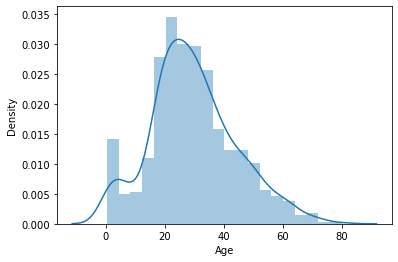

In [8]:
sns.distplot(df.Age)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

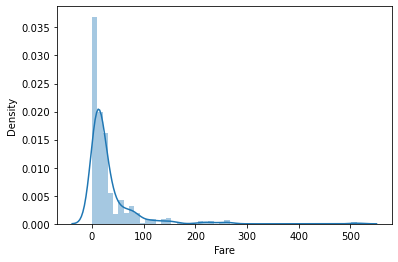

In [9]:
sns.distplot(df.Fare)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

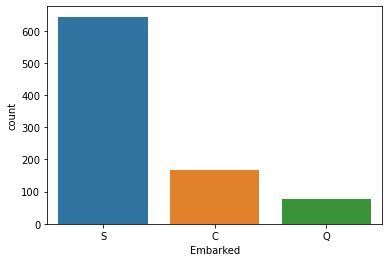

In [10]:
sns.countplot(df.Embarked)

<AxesSubplot:xlabel='Sex', ylabel='count'>

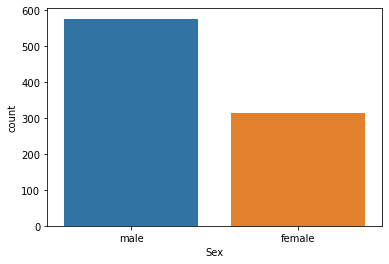

In [11]:
sns.countplot(df.Sex)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

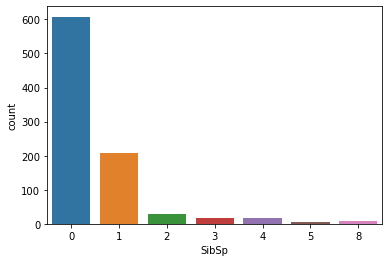

In [12]:
sns.countplot(df.SibSp)

<AxesSubplot:xlabel='Parch', ylabel='count'>

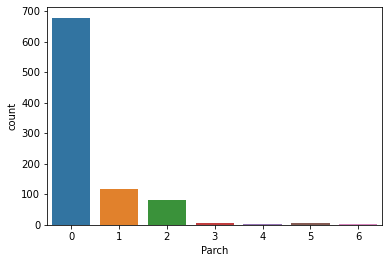

In [13]:
sns.countplot(df.Parch)

In [14]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [15]:
df[df.Embarked.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [16]:
df[df.Age.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,NaN,0,0,8.4583,Q
17,1,2,male,NaN,0,0,13.0000,S
19,1,3,female,NaN,0,0,7.2250,C
26,0,3,male,NaN,0,0,7.2250,C
28,1,3,female,NaN,0,0,7.8792,Q
...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C
863,0,3,female,NaN,8,2,69.5500,S
868,0,3,male,NaN,0,0,9.5000,S
878,0,3,male,NaN,0,0,7.8958,S


Creating Bucket for Fare. The variable would be used for imputing the missing values for Age and Embarkment

In [17]:
df['Fare_Buck']=pd.cut(df.Fare,[-1,25,50,75,100,1000],labels=['Low','Medium','High','VHigh','ExHigh'])

<AxesSubplot:xlabel='Fare_Buck', ylabel='count'>

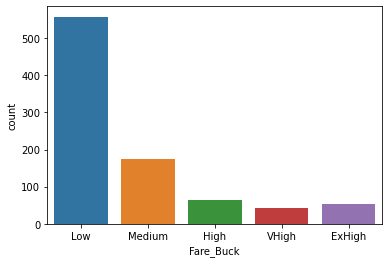

In [18]:
sns.countplot(df.Fare_Buck)

In [19]:
df[df['Survived']==1].groupby(['Pclass','Sex','Fare_Buck'])['Embarked'].value_counts()

Pclass  Sex     Fare_Buck  Embarked
1       female  Medium     S            6
                           C            5
                High       S           13
                           C            7
                VHigh      S           13
                           C           12
                           Q            1
                ExHigh     C           18
                           S           14
        male    Medium     S           17
                           C            6
                High       S            5
                           C            3
                VHigh      C            5
                           S            2
                ExHigh     S            4
                           C            3
2       female  Low        S           33
                           C            4
                           Q            2
                Medium     S           26
                           C            3
                High       S            

There is no such relation for Embarkment. Thus imputing the mode which is `S` for the Embarked columns for the missing value

In [20]:
df.loc[df.Embarked.isnull(),'Embarked']='S'

In [21]:
df[df.Embarked.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_Buck


Imputing values for Age

In [22]:
res=df.groupby(['Pclass','Sex','Fare_Buck'])['Age'].median().rename('Median').reset_index()
res

,Pclass,Sex,Fare_Buck,Median
0,1,female,Low,NaN
1,1,female,Medium,37.0
2,1,female,High,35.0
3,1,female,VHigh,35.0
4,1,female,ExHigh,31.0
5,1,male,Low,38.5
6,1,male,Medium,45.5
7,1,male,High,42.0
8,1,male,VHigh,41.0
9,1,male,ExHigh,35.0


In [23]:
def age_calc(x):
    return res.loc[ (res.Pclass==x.Pclass)  & (res.Sex==x.Sex) & (res.Fare_Buck==x.Fare_Buck),'Median'].values[0]

In [24]:
df.loc[df.Age.isnull(),'Age']=df[df.Age.isnull()].apply(age_calc,axis=1)

In [25]:
df.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age          3
SibSp        0
Parch        0
Fare         0
Embarked     0
Fare_Buck    0
dtype: int64

In [26]:
df[df.Age.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_Buck
180,0,3,female,NaN,8,2,69.55,S,High
792,0,3,female,NaN,8,2,69.55,S,High
863,0,3,female,NaN,8,2,69.55,S,High


3 records are still null. Need to impute these values

In [27]:
df[(df.Pclass==3) & (df.Sex=='female')].median()

Survived     0.500
Pclass       3.000
Age         22.000
SibSp        0.000
Parch        0.000
Fare        12.475
dtype: float64

In [28]:
df.loc[df.Age.isnull(),'Age']=22.0  # imputing with median value

Check for Data imbalance

In [29]:
sum(df.Survived)/len(df) *100

38.38383838383838

## Step 2: Data Preparation

In [30]:
# Creating Dummy Variable for Pclass
Pclass=pd.get_dummies(df.Pclass, prefix='Class', drop_first=True)

# Creating Dummy Variable for Embarked
Embarked=pd.get_dummies(df.Embarked, prefix='Embarked', drop_first=True)

#Concatenate the Dataset
df=pd.concat([df,Pclass,Embarked],axis=1)

In [31]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_Buck,Class_2,Class_3,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,7.2500,S,Low,0,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,High,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,Low,0,1,0,1
3,1,1,female,35.0,1,0,53.1000,S,High,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,Low,0,1,0,1


**Dropping repeated features**

In [32]:
# Drop categorical column from which dummies variable created
df.drop(['Pclass','Embarked'],axis=1,inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Sex         891 non-null    object  
 2   Age         891 non-null    float64 
 3   SibSp       891 non-null    int64   
 4   Parch       891 non-null    int64   
 5   Fare        891 non-null    float64 
 6   Fare_Buck   891 non-null    category
 7   Class_2     891 non-null    uint8   
 8   Class_3     891 non-null    uint8   
 9   Embarked_Q  891 non-null    uint8   
 10  Embarked_S  891 non-null    uint8   
dtypes: category(1), float64(2), int64(3), object(1), uint8(4)
memory usage: 46.4+ KB


In [34]:
# Creating Dummy Variable for Embarked
Sex=pd.get_dummies(df.Sex,  drop_first=True)

#Concatenate the Dataset
df=pd.concat([df,Sex],axis=1)

In [35]:
# Drop the remaining categorical column and the Fare bucked column created 
df.drop(['Sex','Fare_Buck'],axis=1,inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Class_2     891 non-null    uint8  
 6   Class_3     891 non-null    uint8  
 7   Embarked_Q  891 non-null    uint8  
 8   Embarked_S  891 non-null    uint8  
 9   male        891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 39.3 KB


In [37]:
df.describe()

,Survived,Age,SibSp,Parch,Fare,Class_2,Class_3,Embarked_Q,Embarked_S,male
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,29.304343,0.523008,0.381594,32.204208,0.206510,0.551066,0.086420,0.725028,0.647587
std,0.486592,13.382640,1.102743,0.806057,49.693429,0.405028,0.497665,0.281141,0.446751,0.477990
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,26.000000,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,36.000000,1.000000,0.000000,31.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


Data is ready for further processing

**Train-Test Split**

In [38]:
#Putting feature variables into X
X=df.drop('Survived',axis=1)

#Fetch Target Variable
y=df['Survived']

In [39]:
# Split the data

X_train, X_test, y_train, y_test= train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

**Data Scaling**

In [40]:
scaler=StandardScaler()

X_train[['Age','SibSp','Parch','Fare']]=scaler.fit_transform(X_train[['Age','SibSp','Parch','Fare']])

In [41]:
X_train.head()

,Age,SibSp,Parch,Fare,Class_2,Class_3,Embarked_Q,Embarked_S,male
69,-0.270115,1.298708,-0.463118,-0.462475,0,1,0,1,1
85,0.257472,2.189781,-0.463118,-0.324753,0,1,0,1,0
794,-0.345484,-0.483440,-0.463118,-0.477166,0,1,0,1,1
161,0.785059,-0.483440,-0.463118,-0.326669,1,0,0,1,0
815,0.672005,-0.483440,-0.463118,-0.628459,0,0,0,1,1


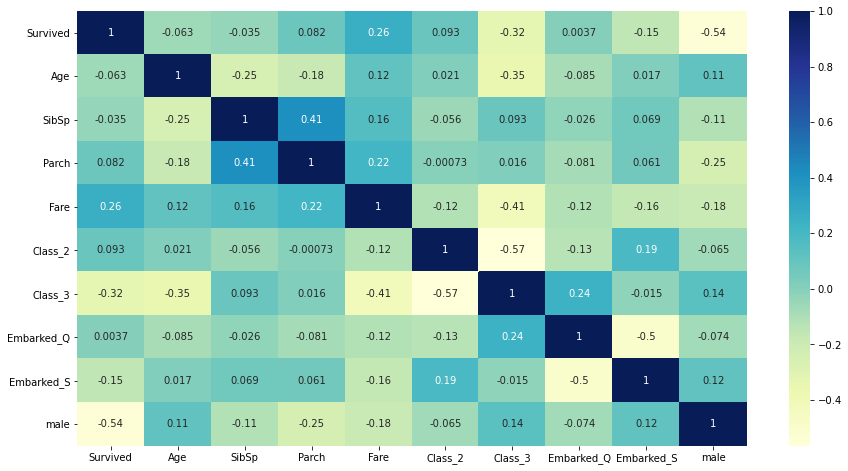

In [42]:
#before starting with  the Model building, checking the correlation
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.show()

## Step 3: Model Building

In [43]:
#Importing necessary libraries
import statsmodels.api as sm
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [44]:
col=X.columns
col

Index(['Age', 'SibSp', 'Parch', 'Fare', 'Class_2', 'Class_3', 'Embarked_Q',
       'Embarked_S', 'male'],
      dtype='object')

#### Model 1



X_train_1=sm.add_constant(X_train[col])

In [46]:
ml1= sm.GLM(y_train,X_train_1,family=sm.families.Binomial()).fit()
ml1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  623
Model:                            GLM   Df Residuals:                      613
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -268.46
Date:                Mon, 11 Oct 2021   Deviance:                       536.92
Time:                        08:45:04   Pearson chi2:                     651.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8588      0.386      7.409      0.000       2.103       3.615
Age           -0.5149      0.133     -3.860      0.000      -0.776      -0.253
SibSp         -0.3226      0.142     -2.272      0.023      -0.601      -0.044
Parch         -0.1943      0.124     -1.573      0.116      -0.436       0.048
Fare           0.1530      0.148      1.032      0.302      -0.137       0.443
Class_2       -0.8563      0.365     -2.347      0.019      -1.571      -0.141
Class_3       -2.2133      0.375     -5.898      0.000      -2.949      -1.478
Embarked_Q    -0.4676      0.473     -0.989      0.323      -1.395       0.459
Embarked_S    -0.4412      0.295     -1.497      0.134      -1.019       0.136
male          -2.8433      0.249    -11.426      0.000      -3.331      -2.356
==============================================================================
"""

In [47]:
vif=pd.DataFrame()
X=X_train_1
vif['Features']=X.columns
vif['VIF']=[round(variance_inflation_factor(X.values,i),2) for i in range(X.shape[1])]
vif.sort_values('VIF', ascending=False,inplace=True)
vif

,Features,VIF
0,const,11.10
6,Class_3,2.82
5,Class_2,2.06
4,Fare,1.69
8,Embarked_S,1.53
7,Embarked_Q,1.50
3,Parch,1.36
1,Age,1.34
2,SibSp,1.33
9,male,1.14


Dropping Embarked_Q as the p-value is very high

#### Model 2

In [51]:
col=col.drop('Embarked_Q',1)

In [52]:
X_train2=sm.add_constant(X_train[col])
ml2=sm.GLM(y_train, X_train2, family=sm.families.Binomial()).fit()
ml2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  623
Model:                            GLM   Df Residuals:                      614
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -268.95
Date:                Mon, 11 Oct 2021   Deviance:                       537.91
Time:                        08:57:48   Pearson chi2:                     662.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7311      0.360      7.582      0.000       2.025       3.437
Age           -0.5170      0.133     -3.891      0.000      -0.777      -0.257
SibSp         -0.3193      0.141     -2.260      0.024      -0.596      -0.042
Parch         -0.1866      0.122     -1.527      0.127      -0.426       0.053
Fare           0.1608      0.147      1.094      0.274      -0.127       0.449
Class_2       -0.8890      0.362     -2.455      0.014      -1.599      -0.179
Class_3       -2.2850      0.368     -6.212      0.000      -3.006      -1.564
Embarked_S    -0.2911      0.254     -1.148      0.251      -0.788       0.206
male          -2.8110      0.245    -11.468      0.000      -3.291      -2.331
==============================================================================
"""

In [54]:
vif=pd.DataFrame()
X=X_train2
vif['Features']=X.columns
vif['VIF']=[round(variance_inflation_factor(X.values,i),2) for i in range(X.shape[1])]
vif.sort_values('VIF', ascending=False,inplace=True)
vif

,Features,VIF
0,const,9.90
6,Class_3,2.68
5,Class_2,2.03
4,Fare,1.68
3,Parch,1.36
1,Age,1.34
2,SibSp,1.33
8,male,1.13
7,Embarked_S,1.11


Dropping Fare as its p-value is high

#### Model 3

In [56]:
col=col.drop('Fare',1)
X_train3=sm.add_constant(X_train[col])
ml3=sm.GLM(y_train, X_train3, family=sm.families.Binomial()).fit()
ml3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  623
Model:                            GLM   Df Residuals:                      615
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -269.63
Date:                Mon, 11 Oct 2021   Deviance:                       539.26
Time:                        08:59:50   Pearson chi2:                     668.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9027      0.328      8.848      0.000       2.260       3.546
Age           -0.5345      0.132     -4.045      0.000      -0.794      -0.276
SibSp         -0.3019      0.140     -2.156      0.031      -0.576      -0.027
Parch         -0.1564      0.119     -1.315      0.189      -0.389       0.077
Class_2       -1.0613      0.328     -3.237      0.001      -1.704      -0.419
Class_3       -2.5016      0.314     -7.962      0.000      -3.117      -1.886
Embarked_S    -0.3307      0.251     -1.319      0.187      -0.822       0.161
male          -2.8117      0.245    -11.495      0.000      -3.291      -2.332
==============================================================================
"""

In [59]:
vif=pd.DataFrame()
X=X_train3
vif['Features']=X.columns
vif['VIF']=[round(variance_inflation_factor(X.values,i),2) for i in range(X.shape[1])]
vif.sort_values('VIF', ascending=False,inplace=True)
vif

,Features,VIF
0,const,7.36
4,Class_3,1.84
3,Class_2,1.62
1,Age,1.33
2,SibSp,1.11
5,Embarked_S,1.09
6,male,1.09


Drop Parch Freature as p-value is still high

#### Model 4

In [60]:
col=col.drop('Parch',1)
X_train4=sm.add_constant(X_train[col])
ml4=sm.GLM(y_train, X_train4, family=sm.families.Binomial()).fit()
ml4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  623
Model:                            GLM   Df Residuals:                      616
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -270.53
Date:                Mon, 11 Oct 2021   Deviance:                       541.05
Time:                        09:01:33   Pearson chi2:                     675.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8583      0.324      8.817      0.000       2.223       3.494
Age           -0.5222      0.131     -3.992      0.000      -0.779      -0.266
SibSp         -0.3620      0.134     -2.698      0.007      -0.625      -0.099
Class_2       -1.0535      0.328     -3.212      0.001      -1.696      -0.411
Class_3       -2.4893      0.314     -7.925      0.000      -3.105      -1.874
Embarked_S    -0.3437      0.250     -1.378      0.168      -0.833       0.145
male          -2.7456      0.238    -11.550      0.000      -3.212      -2.280
==============================================================================
"""

In [61]:
vif=pd.DataFrame()
X=X_train4
vif['Features']=X.columns
vif['VIF']=[round(variance_inflation_factor(X.values,i),2) for i in range(X.shape[1])]
vif.sort_values('VIF', ascending=False,inplace=True)
vif

,Features,VIF
0,const,7.36
4,Class_3,1.84
3,Class_2,1.62
1,Age,1.33
2,SibSp,1.11
5,Embarked_S,1.09
6,male,1.09


Drop Embarked_S due to its high p-value

#### Model 5

In [62]:
col=col.drop('Embarked_S',1)
X_train5=sm.add_constant(X_train[col])
ml5=sm.GLM(y_train, X_train5, family=sm.families.Binomial()).fit()
ml5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  623
Model:                            GLM   Df Residuals:                      617
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -271.47
Date:                Mon, 11 Oct 2021   Deviance:                       542.94
Time:                        09:02:47   Pearson chi2:                     671.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6830      0.294      9.113      0.000       2.106       3.260
Age           -0.5363      0.131     -4.101      0.000      -0.793      -0.280
SibSp         -0.3922      0.134     -2.935      0.003      -0.654      -0.130
Class_2       -1.1679      0.319     -3.662      0.000      -1.793      -0.543
Class_3       -2.5374      0.313     -8.113      0.000      -3.150      -1.924
male          -2.7843      0.237    -11.759      0.000      -3.248      -2.320
==============================================================================
"""

In [63]:
vif=pd.DataFrame()
X=X_train4
vif['Features']=X.columns
vif['VIF']=[round(variance_inflation_factor(X.values,i),2) for i in range(X.shape[1])]
vif.sort_values('VIF', ascending=False,inplace=True)
vif

,Features,VIF
0,const,7.36
4,Class_3,1.84
3,Class_2,1.62
1,Age,1.33
2,SibSp,1.11
5,Embarked_S,1.09
6,male,1.09


This model looks fine as the p-value and VIF are within range

## Step 4: Model Evaluation

In [65]:
y_train_pred=ml5.predict(X_train5)

y_train_predict=pd.DataFrame({'Actual':y_train.values,'Prob':y_train_pred })

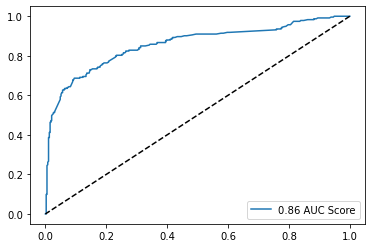

In [72]:
fpr, tpr, threshold=metrics.roc_curve(y_train,y_train_pred,drop_intermediate=False)
auc=metrics.roc_auc_score(y_train,y_train_pred)
plt.plot(fpr,tpr,label='%0.2f AUC Score'%auc)
plt.plot([1,0],[1,0],'k--')
plt.legend(loc="lower right")
plt.show()

In [73]:
num=[float(i)/10 for i in range(10)]

for i in num:
    y_train_predict[i]=y_train_predict.Prob.apply(lambda x: 1 if x>=i else 0)
y_train_predict

,Actual,Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
69,0,0.047285,1,0,0,0,0,0,0,0,0,0
85,1,0.299181,1,1,1,0,0,0,0,0,0,0
794,0,0.094167,1,0,0,0,0,0,0,0,0,0
161,1,0.783082,1,1,1,1,1,1,1,1,0,0
815,0,0.432394,1,1,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
855,1,0.690714,1,1,1,1,1,1,1,0,0,0
871,1,0.860471,1,1,1,1,1,1,1,1,1,0
835,1,0.894972,1,1,1,1,1,1,1,1,1,0
792,0,0.103969,1,1,0,0,0,0,0,0,0,0


**Find Optimal Cut-Off probability**

In [82]:
cut_off_mat=pd.DataFrame(columns=['Prob','Accuracy', 'Precision','Recall', 'F1'])

for i in num:
    cnf=metrics.confusion_matrix(y_train_predict['Actual'],y_train_predict[i])
    tot=sum(sum(cnf))
    acc=(cnf[0,0]+cnf[1,1])/tot
    rec=cnf[1,1]/(cnf[1,0]+cnf[1,1])
    pre=cnf[1,1]/(cnf[0,1]+cnf[1,1])
    f1=2*pre*rec/(pre+rec)
    cut_off_mat.loc[i]=[i,acc,pre,rec,f1]
cut_off_mat

,Prob,Accuracy,Precision,Recall,F1
0.0,0.0,0.373997,0.373997,1.000000,0.544393
0.1,0.1,0.617978,0.494172,0.909871,0.640483
0.2,0.2,0.709470,0.573864,0.866953,0.690598
0.3,0.3,0.762440,0.642140,0.824034,0.721805
0.4,0.4,0.791332,0.705179,0.759657,0.731405
0.5,0.5,0.807384,0.770335,0.690987,0.728507
0.6,0.6,0.823435,0.855491,0.635193,0.729064
0.7,0.7,0.799358,0.935484,0.497854,0.649860
0.8,0.8,0.768860,0.949495,0.403433,0.566265
0.9,0.9,0.701445,0.960784,0.210300,0.345070


In [ ]:
cut_off_mat.index

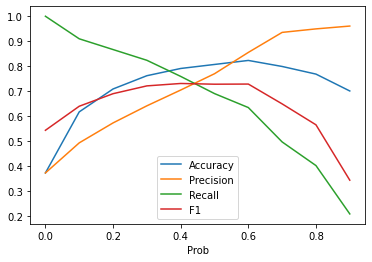

In [83]:
cut_off_mat.plot(x='Prob', y=['Accuracy','Precision','Recall', 'F1'])
plt.show()

Optimal cut-off is 0.4. But as per the competetion we would need to target the accuracy. So we would be choosing probability as 0.6

In [115]:
y_train_predict['Final_Pred']=y_train_predict['Prob'].apply(lambda x: 1 if x>0.6 else 0)

confusion=metrics.confusion_matrix(y_train_predict['Actual'],y_train_predict['Final_Pred'])
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]
TP=confusion[1,1]

In [116]:
#Sesitivity
print('Sensitivity: ',confusion[1,1]/(confusion[1,1]+confusion[1,0]))

#Specificity
print('Specificity: ',confusion[0,0]/(confusion[0,0]+confusion[0,1]))

#Accuracy
print('Accuracy: ', (confusion[0,0]+confusion[1,1]) / sum(sum(confusion)))

#Recall
r=confusion[1,1]/(confusion[1,1]+confusion[1,0])
print('Recall: ',r)

#Precision
p=confusion[1,1]/(confusion[1,1]+confusion[0,1])
print('Precision: ',p)

#F1-Score
print('F1-Score: ',(2*p*r/(p+r)))


Sensitivity:  0.6351931330472103
Specificity:  0.9358974358974359
Accuracy:  0.8234349919743178
Recall:  0.6351931330472103
Precision:  0.8554913294797688
F1-Score:  0.729064039408867


## Step 5: Model Prediction

In [88]:
X_test[['Age','SibSp','Parch','Fare']]=scaler.transform(X_test[['Age','SibSp','Parch','Fare']])

In [89]:
X_test=X_test[col]
X_test_sm=sm.add_constant(X_test)

y_test_prob = ml5.predict(X_test_sm)

In [117]:
y_test_pred = pd.DataFrame({"Test_Acutal":y_test.values, "Test_Prob":y_test_prob.values})
y_test_pred['Pred_Val']=y_test_pred.Test_Prob.apply(lambda x: 1 if x>0.6 else 0)

ValueError: arrays must all be same length

In [91]:
confusion2=metrics.confusion_matrix(y_test_pred['Test_Acutal'],y_test_pred['Pred_Val'])
TN=confusion2[0,0]
FP=confusion2[0,1]
FN=confusion2[1,0]
TP=confusion2[1,1]

In [92]:
#Sesitivity
print('Sensitivity: ',confusion2[1,1]/(confusion2[1,1]+confusion2[1,0]))

#Specificity
print('Specificity: ',confusion2[0,0]/(confusion2[0,0]+confusion2[0,1]))

#Accuracy
print('Accuracy: ', (confusion2[0,0]+confusion2[1,1]) / sum(sum(confusion2)))

#Recall
r=confusion2[1,1]/(confusion2[1,1]+confusion2[1,0])
print('Recall: ',r)

#Precision
p=confusion2[1,1]/(confusion2[1,1]+confusion2[0,1])
print('Precision: ',p)

#F1-Score
print('F1-Score: ',(2*p*r/(p+r)))


Sensitivity:  0.7614678899082569
Specificity:  0.8490566037735849
Accuracy:  0.8134328358208955
Recall:  0.7614678899082569
Precision:  0.7757009345794392
F1-Score:  0.7685185185185185


In [94]:
ml5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  623
Model:                            GLM   Df Residuals:                      617
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -271.47
Date:                Mon, 11 Oct 2021   Deviance:                       542.94
Time:                        12:10:33   Pearson chi2:                     671.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6830      0.294      9.113      0.000       2.106       3.260
Age           -0.5363      0.131     -4.101      0.000      -0.793      -0.280
SibSp         -0.3922      0.134     -2.935      0.003      -0.654      -0.130
Class_2       -1.1679      0.319     -3.662      0.000      -1.793      -0.543
Class_3       -2.5374      0.313     -8.113      0.000      -3.150      -1.924
male          -2.7843      0.237    -11.759      0.000      -3.248      -2.320
==============================================================================
"""

Scores above looks good on the Test Data. As see from above only 5 variables are used we would drop the remaining columns and would need to create the dummy varable for Class and Sex. Also we would need to impute missing values for Age.

For imputation of Age variable we would also need to create a temporary Fare bucket.


## Step 6: Data Submission on Final Data

In [93]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Step 6a: Data Clean

In [95]:
test['Fare_Buck']=pd.cut(test.Fare,[-1,25,50,75,100,1000],labels=['Low','Medium','High','VHigh','ExHigh'])

res=test.groupby(['Pclass','Sex','Fare_Buck'])['Age'].median().rename('Median').reset_index()


def age_calc(x):
    return res.loc[ (res.Pclass==x.Pclass)  & (res.Sex==x.Sex) & (res.Fare_Buck==x.Fare_Buck),'Median'].values[0]

test.loc[test.Age.isnull(),'Age']=test[test.Age.isnull()].apply(age_calc,axis=1)



In [96]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              2
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Fare_Buck        1
dtype: int64

In [97]:
test[test.Age.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Buck
188,1080,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S,High
365,1257,3,"Sage, Mrs. John (Annie Bullen)",female,NaN,1,9,CA. 2343,69.55,NaN,S,High


In [100]:
test.loc[test.Age.isnull(),'Age']=test.loc[(test.Pclass==3) & (test.Sex=='female'),'Age'].median()

### Step 6b: Data Prep

In [102]:
# Creating Dummy Variable for Pclass
Pclass=pd.get_dummies(test.Pclass, prefix='Class', drop_first=True)

# Creating Dummy Variable for Sex
Sex=pd.get_dummies(test.Sex, drop_first=True)

#Concatenate the Dataset
test=pd.concat([test,Sex,Pclass],axis=1)


# Drop the remaining categorical column and the Fare bucked column created 
test.drop(['Sex','Fare_Buck','Pclass','Name','Cabin','Embarked','Ticket',],axis=1,inplace=True)

Parch and Fare are not dropped now. These variables are used by the scaler. So would be dropped post scaling

In [103]:
test.head()

,PassengerId,Age,SibSp,male,Class_2,Class_3
0,892,34.5,0,1,0,1
1,893,47.0,1,0,0,1
2,894,62.0,0,1,1,0
3,895,27.0,0,1,0,1
4,896,22.0,1,0,0,1


In [106]:
#Putting feature variables into X
X_test=test.drop('PassengerId',axis=1)

#Fetch Target Variable
y=pd.DataFrame({'PassengerId':test['PassengerId']})            

### Step 6c: Final Predictions

In [118]:
X_test[['Age','SibSp','Parch','Fare']]=scaler.transform(X_test[['Age','SibSp','Parch','Fare']])

X_test=X_test[col]
X_test_sm=sm.add_constant(X_test)

y_test_prob = ml5.predict(X_test_sm)

KeyError: "['Parch', 'Fare'] not in index"

In [113]:
y['Survived']=y_test_prob.apply(lambda x: 1 if x>0.6 else 0)

In [114]:
y.to_csv('my_submission.csv', index=False)